## 知識情報学 第2回演習サンプルプログラム ex2.ipynb
- Programmed by Wu Hongle, 監修　福井健一
- Last update: 2018/09/14
- Checked with Python 3.8.8, scikit-learn 1.0
- MIT License

## k近傍法による分類と識別面のプロット

In [8]:
%matplotlib inline
from sklearn import datasets
import numpy as np
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

### データの読み込みと標準化
- 【課題2】近傍数kを変更してみましょう．
- 【課題3】使用する特徴量(d1,d2)を変更してみましょう．

In [9]:
# K近傍法の近傍数パラメータ k
neighbors = 5
# テストデータ分割のための乱数のシード（整数値）
random_seed = 1
#　テストデータの割合
test_proportion = 0.3
# Iris データセットをロード 
iris = datasets.load_iris()
# 使用する特徴の次元を(Irisの場合は0,1,2,3から)2つ指定．d1とd2は異なる次元を指定すること
d1 = 0
d2 = 1
# d1,d2列目の特徴量を使用 
X = iris.data#[:, [d1, d2]]
# クラスラベルを取得
y = iris.target
# z標準化
X_std = scale(X)

### 課題1(a) データを学習データとテストデータに分割
- train_test_split()を使用し，変数test_proportionの割合をテストデータとし，変数random_seedを乱数生成器の状態に設定
- https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size = test_proportion, random_state=random_seed)

### 課題1(b) クラスKNeighborsClassifierを使用してk近傍法のインスタンスを生成
- 近傍数kは上で指定したneighborsを使用

In [11]:
knn = KNeighborsClassifier(n_neighbors=neighbors)

### k近傍法のモデルに学習データを適合

In [12]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

### 正答率の算出

In [13]:
acc_train = accuracy_score(y_train, knn.predict(X_train))
acc_test  = accuracy_score(y_test, knn.predict(X_test))
print('k=%d, features=(%d,%d)' % (neighbors, d1, d2))
print('accuracy for training data: %f' % acc_train)
print('accuracy for test data: %f' % acc_test)

k=5, features=(0,1)
accuracy for training data: 0.971429
accuracy for test data: 0.955556


### 識別境界面をプロットする関数
各格子点に対してk近傍法で識別を行い，識別結果に応じて色を付けている

In [7]:
def plot_decision_boundary(label_arg = None):
    x1_min, x1_max = X_train[:, 0].min() - 0.5, X_train[:, 0].max() + 0.5
    x2_min, x2_max = X_train[:, 1].min() - 0.5, X_train[:, 1].max() + 0.5
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, 0.02),
                           np.arange(x2_min, x2_max, 0.02))
                       
    Z = knn.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)

    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    plt.figure(figsize=(10,10))
    plt.subplot(211)

    plt.contourf(xx1, xx2, Z, alpha=0.5, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y_train)):
        plt.scatter(x=X_train[y_train == cl, 0], y=X_train[y_train == cl, 1],
                    alpha=0.8, c=colors[idx],
                    marker=markers[idx], label=cl)

    if label_arg == None:
        plt.xlabel('sepal length [standardized]')
        plt.ylabel('sepal width [standardized]')
    else:
        plt.xlabel(label_arg[0])
        plt.ylabel(label_arg[1])
        
    plt.title('train_data')

    plt.subplot(212)

    plt.contourf(xx1, xx2, Z, alpha=0.5, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y_test)):
        plt.scatter(x=X_test[y_test == cl, 0], y=X_test[y_test == cl, 1],
                    alpha=0.8, c=colors[idx],
                    marker=markers[idx], label=cl)

    if label_arg == None:
        plt.xlabel('sepal length [standardized]')
        plt.ylabel('sepal width [standardized]')
    else:
        plt.xlabel(label_arg[0])
        plt.ylabel(label_arg[1])
        
    plt.title('test_data')
    plt.show()

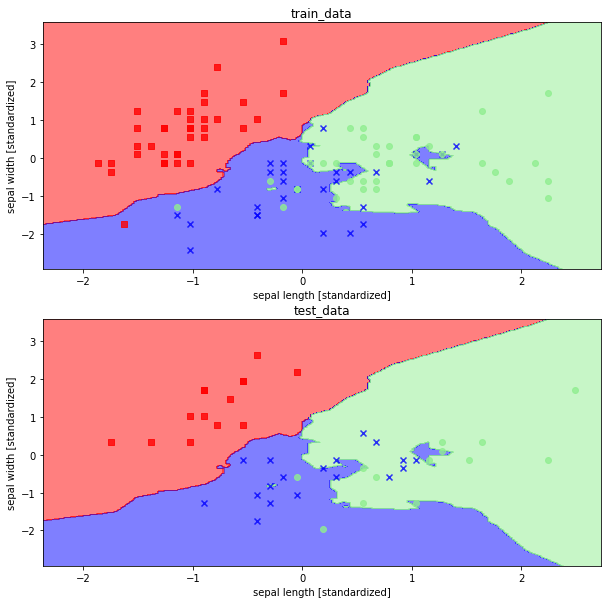

In [8]:
plot_decision_boundary()

### 課題2-2 近傍数kの影響について

まず，横軸に近傍数k，縦軸にaccuracyをプロットしたグラフを以下に示す  
(これは特徴量を二つ選んで射影しているのでデータ全体では異なる結果になる可能性はあることに注意する)

In [9]:
df = datasets.load_iris(as_frame=True)

In [10]:
df['data'].head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


以下ではがくの長さ，幅の特徴量を使った際の議論を行う

In [11]:
max_neighbors = 105 #最大の近傍数
acc_train_list = []
acc_test_list = []
for k in range(1,max_neighbors+1):
    knn = KNeighborsClassifier(n_neighbors=k, algorithm='auto')
    knn.fit(X_train, y_train)    
    acc_train = accuracy_score(y_train, knn.predict(X_train))
    acc_test  = accuracy_score(y_test, knn.predict(X_test))
    acc_train_list.append(acc_train)
    acc_test_list.append(acc_test)

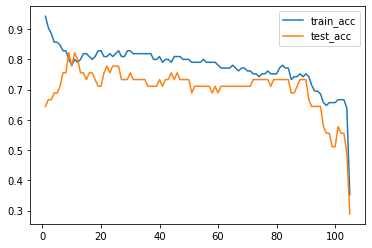

In [12]:
plt.plot(range(1,max_neighbors+1), acc_train_list, label = "train_acc")
plt.plot(range(1,max_neighbors+1), acc_test_list, label = "test_acc")
plt.legend()

In [13]:
acc_train_list[0]

0.9428571428571428

まず初めにknnアルゴリズムの特性上，通常近傍数　k=1　の場合には訓練誤差は0となり，100%の精度で予測できるはずであるが，今回のデータではk=1の場合でも精度が94%にとどまった結果が得られた．  
これは訓練データの中に同じ特徴量ベクトルであるが，ターゲットの値が異なるデータが含まれていたからだと推測できる．  
実際に訓練データ X_trainのデータ個数方向のユニークを取ると以下のようになる

In [14]:
print("X_trainのデータ数",len(X_train))
print("X_trainのユニークデータ数", len(np.unique(X_train, axis = 0)))

X_trainのデータ数 105
X_trainのユニークデータ数 90


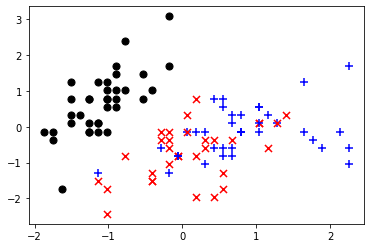

In [15]:
markers = ['o', 'x', '+']
color = ['k', 'r', 'b']
for i in range(len(X_train)):
    plt.scatter(X_train[i,0], X_train[i,1], marker=markers[y_train[i]], color = color[y_train[i]], s = 50)

以上のようにいくつかの点が同じ座標にありながら，異なるクラスを表していることがわかる．

In [16]:
len(X_train)

105

さらに今回の教師データの数は105個であったため近傍数は105を超えて設定することはできない．  
この最大の近傍数を設定した際には全ての教師データの多数決を取ることに相当するのでいかなる入力に対しても教師データに含まれる一番多いターゲットの値を出力することとなる．  
教師データに含まれる各ターゲットの総数は以下のようになる

In [17]:
[sum(y_train == i) for i in range(3)]

[36, 32, 37]

従ってターゲット2(0 indexed)が一番多く含まれているためk=105を設定した際には全ての入力に対して2を出力することとなる．  

In [18]:
print("全部２と予測した際の訓練正答率",max([sum(y_train == i) for i in range(3)]) / sum([sum(y_train == i) for i in range(3)]))
print("k=105の際の訓練正答率",acc_train_list[-1])

全部２と予測した際の訓練正答率 0.3523809523809524
k=105の際の訓練正答率 0.3523809523809524


続いて近傍数kと汎化性能の関係について考察を行う．  
グラフより近傍数の値が小さい時には訓練誤差とテスト誤差の乖離が大きいことがわかる，これは近傍数が小さい範囲では入力となるデータのベクトルに対して局所的な範囲しか見ないので上述の通り訓練データに対しては過適合するような状態になっている，さらに未知のデータに対しては未知データの特徴量周りの教師データの値を完全に信頼することとなるのでもしも教師データの入出力関係にノイズが入って必ずしも正しい結果でない場合には精度が著しく落ちることが予想される．  
またデータの分布が疎である領域に対してはさらに予測が困難になることも推測される

以下では近傍数kの値の変化によってどのように分離領域が変化していくのかについて見ていく  
プロットするために新しくplot関数を定義する

In [19]:
def plot_decision_boundary_2(k_list:list):
    K = len(k_list) #length of list
    plt.figure(figsize = (28,12))
    for i,k in enumerate(k_list):
        knn = KNeighborsClassifier(n_neighbors=k, algorithm='auto')
        knn.fit(X_train, y_train)

        x1_min, x1_max = X_train[:, 0].min() - 0.5, X_train[:, 0].max() + 0.5
        x2_min, x2_max = X_train[:, 1].min() - 0.5, X_train[:, 1].max() + 0.5
        xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, 0.02),
                               np.arange(x2_min, x2_max, 0.02))

        Z = knn.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
        Z = Z.reshape(xx1.shape)

        markers = ('s', 'x', 'o', '^', 'v')
        colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
        cmap = ListedColormap(colors[:len(np.unique(y))])

        
        plt.subplot(2,K,i+1)

        plt.contourf(xx1, xx2, Z, alpha=0.5, cmap=cmap)
        plt.xlim(xx1.min(), xx1.max())
        plt.ylim(xx2.min(), xx2.max())

        for idx, cl in enumerate(np.unique(y_train)):
            plt.scatter(x=X_train[y_train == cl, 0], y=X_train[y_train == cl, 1],
                        alpha=0.8, c=colors[idx],
                        marker=markers[idx], label=cl)


        plt.xlabel('sepal length [standardized]')
        plt.ylabel('sepal width [standardized]')
        plt.title('train_data')

        plt.subplot(2,K,i+1+K)

        plt.contourf(xx1, xx2, Z, alpha=0.5, cmap=cmap)
        plt.xlim(xx1.min(), xx1.max())
        plt.ylim(xx2.min(), xx2.max())

        for idx, cl in enumerate(np.unique(y_test)):
            plt.scatter(x=X_test[y_test == cl, 0], y=X_test[y_test == cl, 1],
                        alpha=0.8, c=colors[idx],
                        marker=markers[idx], label=cl)


        plt.xlabel('sepal length [standardized]')
        plt.ylabel('sepal width [standardized]')
        plt.title('test_data')
    plt.show()

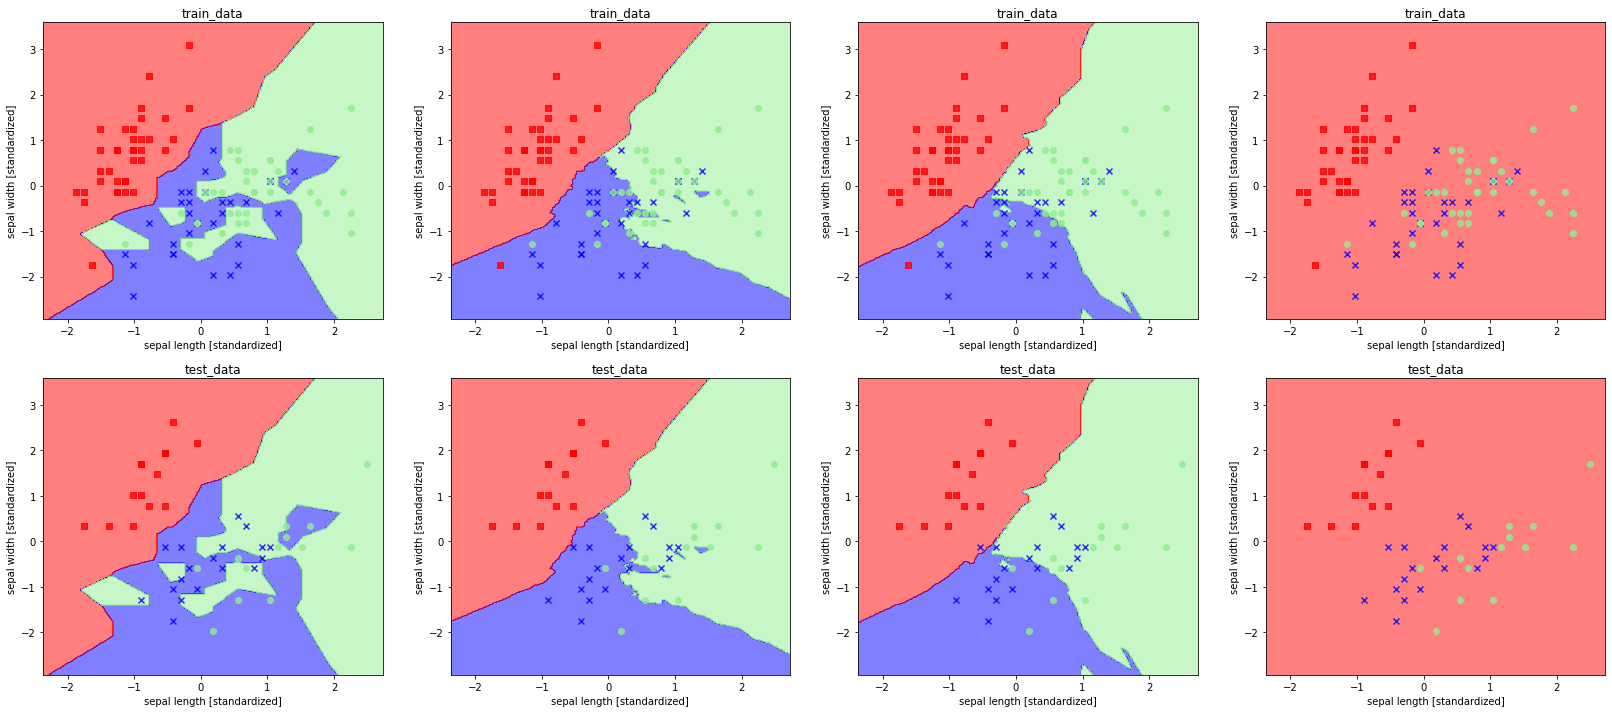

In [20]:
plot_decision_boundary_2([1,10,50,105])

上のグラフはk = [1,10,50,105]と近傍数を変えて行った際の分離平面である．  
グラフよりkが大きくなるについれて分離境界が徐々に滑らかに繋がれていくことが読み取れる． 
さらに上述のようにk=105の際には任意の入力に対してターゲット2の出力を返す様子が読み取れる．  
このことより，近傍数が大きくなるにつれて局所的な情報よりも大域的な情報を重視していくことが読み取れ，そこにトレードオフの関係が生じる．  
従ってクロスバリデーションなどでちょうど良い近傍数kなどを求めることが必要となると考えられる．

また，KNNのアルゴリズムよりk=1の時にはボロノイ図になっていることが分かるがその様子が上のグラフからも知ることができる．    
つまりk=1の際には学習データ$\{X_i, y_i\}_{i=1}^n$に対して
$$
V\left(X_{i}\right)=\left\{x \in \mathbb{R}^d \mid d\left(x, X_{i}\right) \leq d\left(x, X_{j}\right), j \neq i\right\} \subset \mathbb{R}^d
$$

$$
\mathbb{R}^d = \bigsqcup_{i=1}^n V(X_i)
$$

のように入力特徴量空間$\mathbb{R}^d$が直和分割されて，それぞれの領域$V(X_i)$が$y_i$の結果を返すという関数を構成することとなる．  
特に今回はKNNを2ノルムで動かしているので上での距離関数$d$は二つのベクトルの差の2ノルムの値となる

### 課題2-3 使用する特徴量を変えた際の挙動について

ここでは4つの特徴量から2つの特徴量を選び出してKNNで分類するパターン($_4C_2 = 6$)とPCAとt-SNEによって二次元次元圧縮してKNNで分類する場合の計6通りについて考えることとする  
以下は2つ選び出してKNNで分類した際の訓練誤差，テスト誤差である．

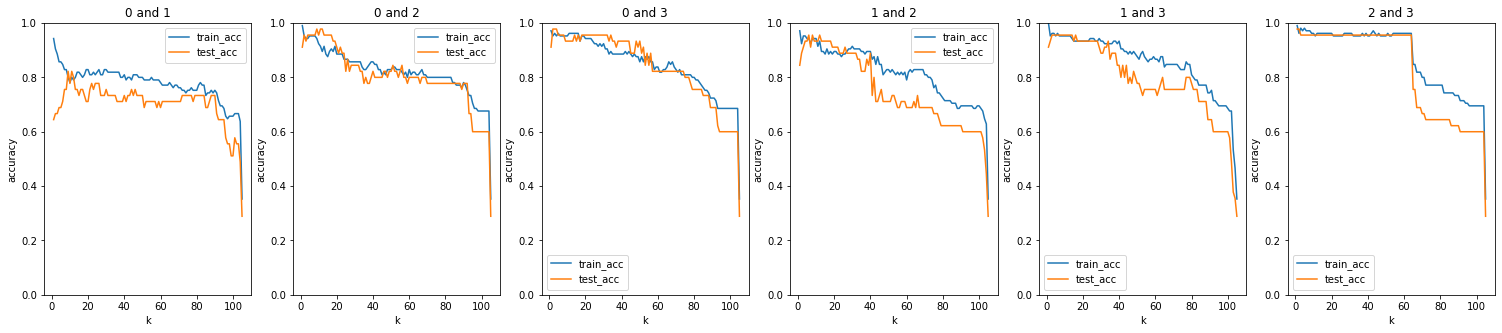

In [21]:
from itertools import combinations
i = 1
plt.figure(figsize = (26,5))
for d1,d2 in combinations(range(4), 2):
    # d1,d2列目の特徴量を使用 
    X = iris.data[:, [d1, d2]]
    # クラスラベルを取得
    y = iris.target
    # z標準化
    X_std = scale(X)
    X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size = test_proportion, random_state=random_seed)
    max_neighbors = 105 #最大の近傍数
    acc_train_list = []
    acc_test_list = []
    for k in range(1,max_neighbors+1):
        knn = KNeighborsClassifier(n_neighbors=k, algorithm='auto')
        knn.fit(X_train, y_train)    
        acc_train = accuracy_score(y_train, knn.predict(X_train))
        acc_test  = accuracy_score(y_test, knn.predict(X_test))
        acc_train_list.append(acc_train)
        acc_test_list.append(acc_test)
    plt.subplot(1,6,i)
    plt.plot(range(1,max_neighbors+1), acc_train_list, label = 'train_acc')
    plt.plot(range(1,max_neighbors+1), acc_test_list, label = 'test_acc')
    plt.xlabel("k")
    plt.ylabel("accuracy")
    plt.ylim((0,1))
    plt.title('{} and {}'.format(d1,d2))
    plt.legend()
    i+=1

結果のグラフより特徴量2と3を選んだ時に顕著に良い結果となっていることが読み取れる．  
実際に特徴量2,3へ射影した二次元プロットと分離平面(k = 10)は以下のようになる．

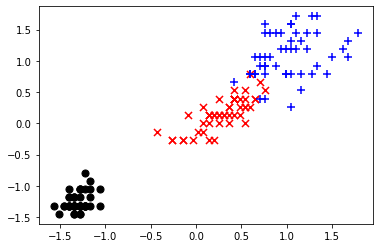

In [22]:
X = iris.data[:, [2, 3]]
# クラスラベルを取得
y = iris.target
# z標準化
X_std = scale(X)

markers = ['o', 'x', '+']
color = ['k', 'r', 'b']
for i in range(len(X)):
    plt.scatter(X_std[i,0], X_std[i,1], marker=markers[y[i]], color = color[y[i]], s = 50)

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size = test_proportion, random_state=random_seed)

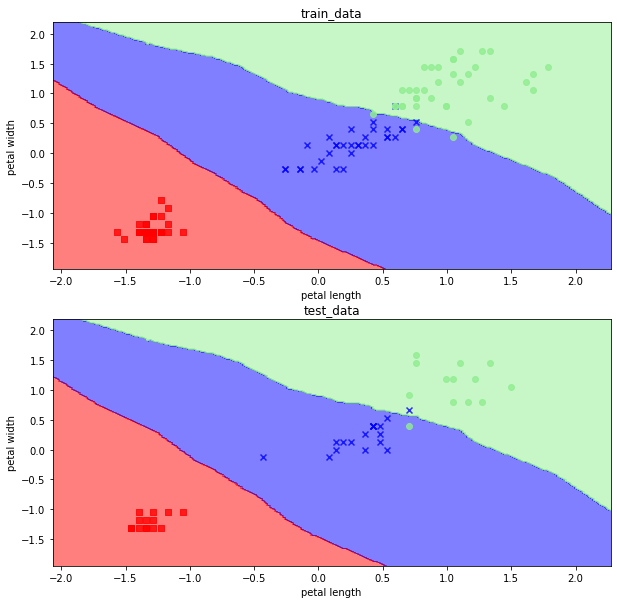

In [24]:
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)
plot_decision_boundary(label_arg = ["petal length", "petal width"])

グラフより上述の特徴量0,1を選んだ時よりもくっきりと各ラベルがクラスターに分かれていることがわかり，KNNはこのようなすでにクラスタリングされているようなデータに対して良い識別性能を持つことがわかる．   
さらにPCAとt-SNEによって次元圧縮したデータについて以下のようになる

In [25]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

Text(0.5, 1.0, 't-SNE dimension reduction')

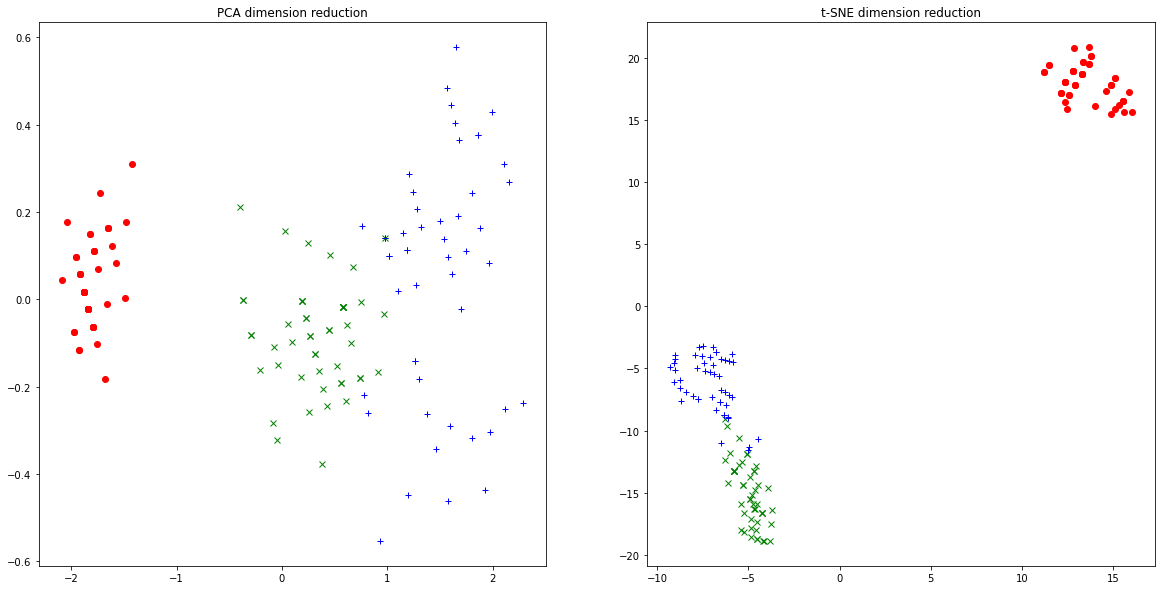

In [26]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_std)
X_tsne = TSNE(n_components=2, random_state=0).fit_transform(X_std)
plt.figure(figsize = (20,10))
plt.subplot(1,2,1)
plt.plot(X_pca[y==0,0], X_pca[y==0,1],"ro")
plt.plot(X_pca[y==1,0], X_pca[y==1,1],"gx")
plt.plot(X_pca[y==2,0], X_pca[y==2,1],"b+")
plt.title("PCA dimension reduction")
plt.subplot(1,2,2)
plt.plot(X_tsne[y==0,0], X_tsne[y==0,1],"ro")
plt.plot(X_tsne[y==1,0], X_tsne[y==1,1],"gx")
plt.plot(X_tsne[y==2,0], X_tsne[y==2,1],"b+")
plt.title("t-SNE dimension reduction")

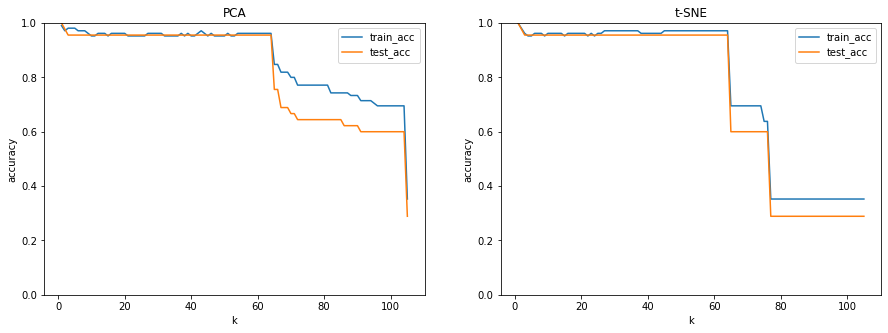

In [27]:
from itertools import combinations
i = 1
plt.figure(figsize = (15,5))
for method in ["PCA", "t-SNE"]:
    if method == "PCA":
        X_std = X_pca
    if method == "t-SNE":
        X_std = X_tsne
    y = iris.target
    X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size = test_proportion, random_state=random_seed)
    max_neighbors = 105 #最大の近傍数
    acc_train_list = []
    acc_test_list = []
    for k in range(1,max_neighbors+1):
        knn = KNeighborsClassifier(n_neighbors=k, algorithm='auto')
        knn.fit(X_train, y_train)    
        acc_train = accuracy_score(y_train, knn.predict(X_train))
        acc_test  = accuracy_score(y_test, knn.predict(X_test))
        acc_train_list.append(acc_train)
        acc_test_list.append(acc_test)
    plt.subplot(1,2,i)
    plt.plot(range(1,max_neighbors+1), acc_train_list, label = 'train_acc')
    plt.plot(range(1,max_neighbors+1), acc_test_list, label = 'test_acc')
    plt.xlabel("k")
    plt.ylabel("accuracy")
    plt.ylim((0,1))
    plt.title("{}".format(method))
    plt.legend()
    i+=1

<Figure size 1080x360 with 0 Axes>

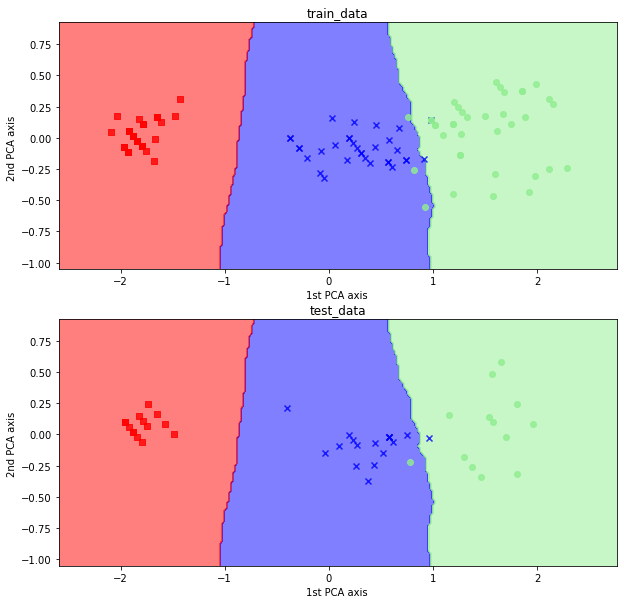

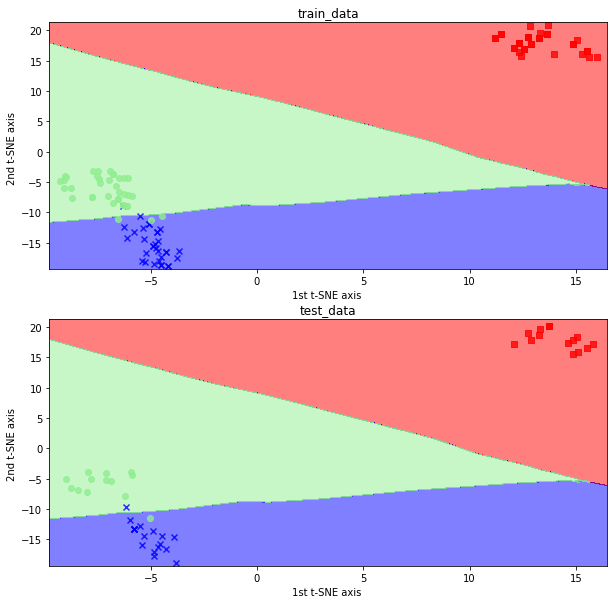

In [28]:
plt.figure(figsize = (15,5))
i = 1
for method in ["PCA", "t-SNE"]:
    if method == "PCA":
        X_std = X_pca
    if method == "t-SNE":
        X_std = X_tsne
    y = iris.target
    X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size = test_proportion, random_state=random_seed)
    knn = KNeighborsClassifier(n_neighbors=10, algorithm='auto')
    knn.fit(X_train, y_train)    
    plot_decision_boundary(["1st {} axis ".format(method), "2nd {} axis ".format(method)])
    i+=1

どちらで次元圧縮を行った場合についても訓練誤差，テスト誤差ともに0に近い値を出しており，過学習も起こしていない状態であることが読み取れる．  
今回のデータについては線形分類できる簡単なデータセットであったためにPCAとt-SNEで大きな性能の差は見られなかったが，より複雑なデータになって非線形の関係性が現れるようであればPCAに比べてt-SNEで次元圧縮した方が性能が良くなっていくことが予想される．

### 追加考察

上述の通りKNNはk=1の時には教師データ${X_i,y_i}$が作るボロノイ図になることが知られている．  
一方で，二値分類問題に対して熱拡散方程式を用いて分類機を作る取り組みが行われている[1]．  
この論文では特徴量空間$\mathbb R^d$として，この特徴量空間を$\mathbb R^d = P \bigsqcup Q$と直和分割する未知の集合$P,Q$に対して$P,Q$の部分集合である$A \subset P, B \subset Q$，つまり学習データが与えられた際に未知の集合$P,Q$を予測する分類機を熱拡散方程式を解くことで作り出すことが考えられている．  
概要としては$\mathbb{R}^d$のd次元空間での熱拡散方程式を考えて，初期値を
$$
u_0(x) = 
\begin{cases}
1 & if \ x \in A\\ 
-1 & if \ x \in B \\
0 & others
\end{cases}
$$

として与えて，熱拡散方程式

$$
u_t(t,x) = u_{xx}(t,x) \ \ \ in \ \ \ (0,T) \times \mathbb{R}^d \\ 
u(0, \cdot) = u_0 \ \ \ on \ \ \ \mathbb{R}^d
$$

を解いてある時刻tにおける特徴量$x \in \mathbb{R}^d$の分類結果を$sgn(u(t,x))$として予測する分類機としてみなすというものである．  
この分類機についてパラメータ$t$はKNNにおける近傍数kと似たようなものとしてみなせるのでないかと考えられる  
実際論文中では，適当な仮定の元で熱拡散方程式の無限伝播性より時間パラメータ$t$の0への右極限を考えた際の
$$f(x;u_0) = lim_{t\rightarrow +0}sgn(u(t,x))$$

で与えられるような二値分類機$f: \mathbb{R}^d \rightarrow \{-1,1\}$が作り出す分離平面はボロノイ図となることが示されている．

さらに直感的なイメージとして熱拡散方程式が時間発展に伴って，経過時間が小さい際にはある点の分類結果は局所的なその点の周りにあるデータの符号の影響を強く受けることが予想されるが，時間経過が大きくなるにつれて，遠くの点の符号も拡散されることでより大域的な情報によってその点の分類結果が決まることとなる．  
パラメータtが大きくなればなるほど局所的な情報から大域的な情報を用いて分類が行われるという点においてこの分類機はKNNとの類似点が多いように思う．  
さらに熱拡散方程式をノイマン境界条件で考えた際には$t\rightarrow \infty$の極限ではこの分類機は任意の入力に対して，教師データの正例と負例の大きい方を出力するという結果となるが，これはKNNにおいて近傍数を教師データの大きいさにした時の挙動と全く同じものである．  
論文中ではこの熱拡散方程式分類機を二値分類だけでなく多値分類問題へ拡張する方法について述べられているのでKNNとの類似点を統計的学習理論の観点から考察できそうだと思った．

# 
以下では上記の熱拡散方程式分類機を実装して，
ターゲットをSetosa,Versicolourの二つに絞った時の二値分類を考えて，KNNとの挙動の違いを比較していく

In [29]:
X = iris.data[1:]
y = iris.target[1:]

In [30]:
X = X[(y == 0) | (y == 1)][:,[0,1]]
y = y[(y==0) | (y==1)]

In [31]:
x1_min, x1_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
x2_min, x2_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5

In [32]:
X_std = X
X_std[:,0] = (X_std[:,0] - x1_min) / (x1_max - x1_min)
X_std[:,1] = (X_std[:,1] - x2_min) / (x2_max - x2_min)

(0.0, 1.0)

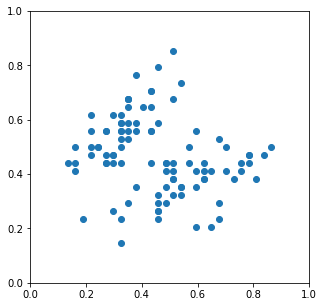

In [33]:
plt.figure(figsize = (5,5))
plt.scatter(X_std[:,0], X_std[:,1])
plt.xlim(0,1)
plt.ylim(0,1)

ここで特徴量ベクトルをMin-Maxスケーリングするので熱拡散方程式の空間方向としては$[0,1] \times [0,1]$の単位平面での熱の時間発展のみに注目すれば良いことになる

In [34]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import animation, rc

In [35]:
dx = 0.01
dt = 0.00001
T = 0.03
D = 0.1
x_width = int(1/dx)
t_width = int(T/dt)
u = np.zeros((t_width, x_width, x_width)) #状態変数を格納する配列
print("noiman const {}".format(D*dt/(dx**2)))

noiman const 0.010000000000000002


In [36]:
def laplacian(t, x, y): #ラプラス演算子
    ts = 0.0
    ts += u[t][x+1][y]
    ts += u[t][x-1][y]
    ts += u[t][x][y+1]
    ts += u[t][x][y-1]
    ts -= 4*u[t][x][y]
    return ts

In [37]:
def calc(t): # 単位平面の1単位時間の時間発展
    for ix in range(1, x_width-1):
        for iy in range(1, x_width-1):
            u[t+1, ix, iy] = u[t,ix,iy] + D*dt/(dx**2)*laplacian(t, ix, iy)
            
    for ix in range(1, x_width-1):
        u[t+1, 0, ix] = u[t+1, 1, ix]
        u[t+1, ix, 0] = u[t+1, ix, 1]
        u[t+1, x_width-1, ix] = u[t+1, x_width-2, ix]
        u[t+1, ix, x_width-1] = u[t+1, ix, x_width - 2]
    u[t+1,0,0] = (u[t+1,0,1] + u[t+1,1,0])/2
    u[t+1,0,x_width-1] = (u[t+1,1,x_width-1] + u[t+1,0,x_width-2])/2
    u[t+1,x_width-1,0] = (u[t+1,x_width-2,0] + u[t+1,x_width-1,1])/2
    u[t+1,x_width-1,x_width-1] = (u[t+1,x_width-2,x_width-1] + u[t+1,x_width-1,x_width-2])/2
        

In [38]:
def to_idx(X):
    """
    note
    ----
    [0,1]スケーリングされた特徴量でないといけない
    """
    return (X/dx).astype(int)
    

In [39]:
#初期点の設定
for i,p in enumerate(X_std):
    x_idx, y_idx = to_idx(p)
    if x_idx == x_width or x_idx == x_width - 1:
        x_idx -= 2
    if y_idx == x_width or x_idx == x_width - 1:
        y_idx -= 2
    u[0][y_idx][x_idx] = -1.0 if y[i] == 0 else 1.0

In [40]:
def simulate():
#    h = x_width//2
#    u[0][h-6:h+6, h-6:h+6] = 10
    for t in range(0,t_width-1):
        calc(t)    

In [41]:
simulate()

In [42]:
np.abs(u[0]).sum()

83.0

In [43]:
u.shape

(2999, 100, 100)

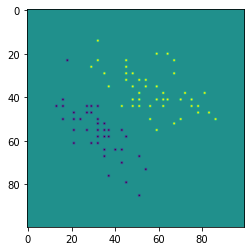

In [44]:
fig = plt.figure()
im = plt.imshow(u[0])
def update(i):
    im.set_array(u[i*100])

In [45]:
rc('animation', html='jshtml')
animation.FuncAnimation(fig, update, interval=50, frames=len(u[::100]))

In [46]:
xx1, xx2 = np.meshgrid(np.arange(0, 1, dx),np.arange(0, 1, dx))

In [47]:
colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
cmap = ListedColormap(colors[:len(np.unique(y))])

In [48]:
def plot_decision_boundary_3(k_list:list):
    K = len(k_list) #length of list
    plt.figure(figsize = (28,6))
    for i,k in enumerate(k_list):
        knn = KNeighborsClassifier(n_neighbors=k, algorithm='auto')
        knn.fit(X_std, y)

        x1_min, x1_max = 0, 1
        x2_min, x2_max = 0, 1
        xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, 0.02),
                               np.arange(x2_min, x2_max, 0.02))

        Z = knn.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
        Z = Z.reshape(xx1.shape)

        markers = ('s', 'x', 'o', '^', 'v')
        colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
        cmap = ListedColormap(colors[:len(np.unique(y))])

        
        plt.subplot(1,K,i+1)

        plt.contourf(xx1, xx2, Z, alpha=0.5, cmap=cmap)
        plt.xlim(xx1.min(), xx1.max())
        plt.ylim(xx2.min(), xx2.max())

        for idx, cl in enumerate(np.unique(y)):
            plt.scatter(x=X_std[y == cl, 0], y=X_std[y == cl, 1],
                        alpha=0.8, c=colors[idx],
                        marker=markers[idx], label=cl)


        plt.xlabel('sepal length [standardized]')
        plt.ylabel('sepal width [standardized]')
        plt.title("k = {}".format(k))

    plt.show()

def plot_decision_boundary_4(k_list:list):
    K = len(k_list) #length of list
    plt.figure(figsize = (28,6))
    for i,k in enumerate(k_list):
        t = k
        k = int(k/dt)
        
        

        x1_min, x1_max = 0, 1
        x2_min, x2_max = 0, 1
        xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, 0.01),
                               np.arange(x2_min, x2_max, 0.01))

        Z = np.zeros_like(u[k])
        for ix in range(x_width):
            for iy in range(x_width):
                Z[iy,ix] = 0  if u[k][iy][ix] <=0 else 1

        markers = ('s', 'x', 'o', '^', 'v')
        colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
        cmap = ListedColormap(colors[:len(np.unique(y))])

        
        plt.subplot(1,K,i+1)

        plt.contourf(xx1, xx2, Z, alpha=0.5, cmap=cmap)
        plt.xlim(xx1.min(), xx1.max())
        plt.ylim(xx2.min(), xx2.max())

        for idx, cl in enumerate(np.unique(y)):
            plt.scatter(x=X_std[y == cl, 0], y=X_std[y == cl, 1],
                        alpha=0.8, c=colors[idx],
                        marker=markers[idx], label=cl)


        plt.xlabel('sepal length [standardized]')
        plt.ylabel('sepal width [standardized]')
        plt.title('time t = {}'.format(t))

    plt.show()

以下にKNNによる分類境界を図示する．

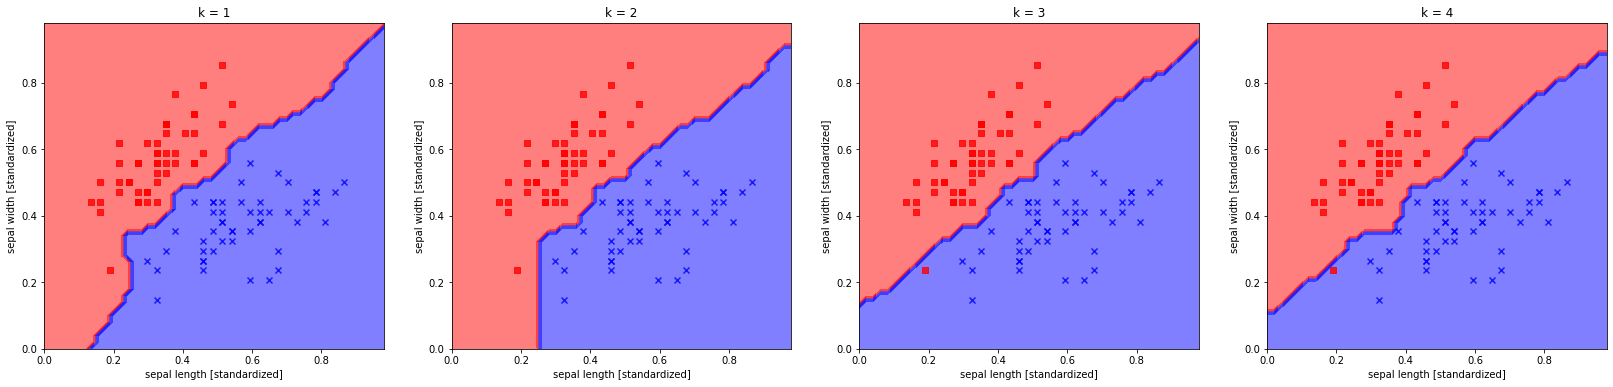

In [70]:
plot_decision_boundary_3([1,2,3,4])

続いて熱拡散分類器による分類境界を図示する.

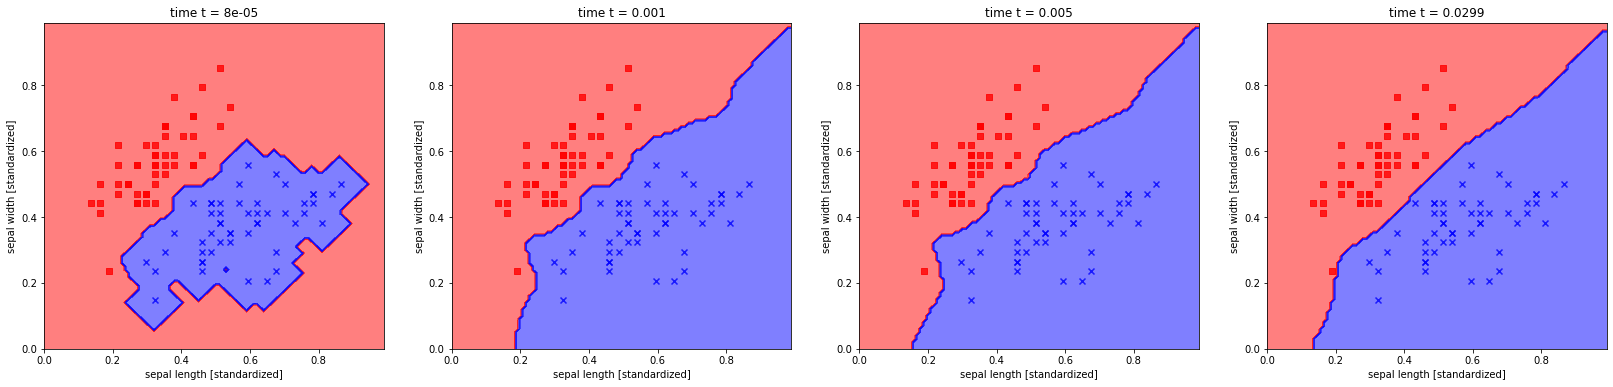

In [67]:
plot_decision_boundary_4([0.00008,0.001,0.005,0.0299])

今回の数値計算ではFCTSスキームでオイラー法によって偏微分方程式を解いたので時間に対して空間グリッド数分の反復を行わなければ全てのセルにたいして値が拡散することができない．  
便宜上0となっている配列に対してはターゲット 0 に分類されるとしているので下の熱拡散分類器では赤い領域が多くなっているが，時間が経過するにつれて右下の領域は青いターゲット1と判別されるようになっている．  
また，$t = 8e-5$の赤い領域と青い領域がぶつかっている境界部分では上のKNNで見られるようなボロノイ図の領域が局所的に見られている．  
さらに，KNNにおけるkの増加と熱拡散分類器のtの増加に伴って左下の領域では同じような領域の遷移が行われていることが確認できる．  
一方で熱拡散分類きは入力特徴量次元数に対して指数オーダーの時間，空間計算量がかかるため，3次元以上のデータに対して適用するためには少し工夫が必要になると推察される．  
今回は数値計算方法としてオイラー法を用いたが，熱拡散の無限伝播性を表現するためには初期データ点をフーリエ変換によって直交関数で展開して偏微分方程式を解くなどのアプローチが考えられる．  

#    
#  
#  
また，今回はPCAやt-SNEなどの教師なし機械学習でクラスタリングを行ったが，KNNの分類においては教師ありデータが得られているので教師データに対してターゲットの点ごとになるべく遠い点に配置するような教師あり学習の枠組みの非線型写像$\phi : R^n \rightarrow R^m\ \ (n\ge m)$を学習してKNNをすればより精度の良い分類ができるのではないかと思った．  
ここで上での写像$\phi$は$n > m$であれば次元圧縮となるし，$n=m$であればKNNがうまくいくような特徴量空間から特徴量空間への変換を想定している．

### 参考文献
[1] Mi-Ho Giga, Yoshikazu Giga, Takeshi Ohtsuka, Noriaki Umeda. On behavior of signs for the heat equation and a diffusion method for data separation. Communications on Pure & Applied Analysis, 2013, 12 (5) : 2277-2296.(https://www.semanticscholar.org/paper/On-behavior-of-signs-for-the-heat-equation-and-a-Giga-Giga/df7e4a617bb8b28515c2ef168d1b42cef66a31f8)